In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.metrics import mean_squared_error

In [2]:
#Loading dataset
df = pd.read_csv('Downloads/Dataset/Train_data.csv')
dftest = pd.read_csv('Downloads/Dataset/Test_data.csv')
df.head()

,Unnamed: 0,code,clientType,registrationMode,planName,accident,duration,country,netSales,netProfit,gender,age
0,1,CBH,Basic,Offline,M,0,186,MALAYSIA,-29.0,9.57,F,81
1,2,CBH,Basic,Offline,M,0,186,MALAYSIA,-29.0,9.57,F,71
2,3,CWT,Basic,Online,Q,0,65,AUSTRALIA,-49.5,29.70,NaN,32
3,4,CWT,Basic,Online,Q,0,60,AUSTRALIA,-39.6,23.76,NaN,32
4,5,CWT,Basic,Online,Q,0,79,ITALY,-19.8,11.88,NaN,41


In [3]:
df.describe().T
#df.head()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,60326.0,30163.500000,17414.760507,1.0,15082.25,30163.5,45244.75,60326.0
accident,60326.0,0.014587,0.119895,0.0,0.00,0.0,0.00,1.0
duration,60326.0,49.325233,99.493754,-2.0,9.00,22.0,53.00,4881.0
netSales,60326.0,40.762807,49.100660,-389.0,18.00,26.5,48.00,810.0
netProfit,60326.0,9.839874,19.892750,0.0,0.00,0.0,11.55,283.5
age,60326.0,39.987418,14.054040,0.0,35.00,36.0,43.00,118.0


In [4]:
dftest.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3000.0,32056.647333,18140.178197,7.0,16886.75,31978.0,47773.5,63311.0
duration,3000.0,49.153000,140.244343,0.0,9.00,22.0,52.0,4784.0
netSales,3000.0,39.479637,43.389846,-148.5,18.00,27.0,48.0,404.0
netProfit,3000.0,9.209107,17.927852,0.0,0.00,0.0,10.5,262.6
age,3000.0,39.619333,13.247777,10.0,35.00,36.0,44.0,118.0


In [5]:
df = df.drop(['Unnamed: 0'], axis =1)
df.head()

,code,clientType,registrationMode,planName,accident,duration,country,netSales,netProfit,gender,age
0,CBH,Basic,Offline,M,0,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Basic,Offline,M,0,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Basic,Online,Q,0,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Basic,Online,Q,0,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Basic,Online,Q,0,79,ITALY,-19.8,11.88,NaN,41


In [6]:
df['clientType'] = df['clientType'].replace({"Basic": 0})
df['clientType'] = df['clientType'].replace({"Premium": 1})
df['registrationMode'] = df['registrationMode'].replace({"Offline": 0})
df['registrationMode'] = df['registrationMode'].replace({"Online": 1})
df.head()

,code,clientType,registrationMode,planName,accident,duration,country,netSales,netProfit,gender,age
0,CBH,0,0,M,0,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,0,0,M,0,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,0,1,Q,0,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,0,1,Q,0,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,0,1,Q,0,79,ITALY,-19.8,11.88,NaN,41


In [7]:
df.code.convert_dtypes(convert_string=True)

0        CBH
1        CBH
2        CWT
3        CWT
4        CWT
        ... 
60321    JZI
60322    JZI
60323    JZI
60324    JZI
60325    JZI
Name: code, Length: 60326, dtype: string

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60326 entries, 0 to 60325
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              60326 non-null  object 
 1   clientType        60326 non-null  int64  
 2   registrationMode  60326 non-null  int64  
 3   planName          60326 non-null  object 
 4   accident          60326 non-null  int64  
 5   duration          60326 non-null  int64  
 6   country           60326 non-null  object 
 7   netSales          60326 non-null  float64
 8   netProfit         60326 non-null  float64
 9   gender            17361 non-null  object 
 10  age               60326 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 5.1+ MB


In [9]:
dataset = df.values
X = dataset[:,1:10]
Y = dataset[:,10]
X,Y

(array([[0, 0, 'M', ..., -29.0, 9.57, 'F'],
        [0, 0, 'M', ..., -29.0, 9.57, 'F'],
        [0, 1, 'Q', ..., -49.5, 29.7, nan],
        ...,
        [1, 1, 'I', ..., 18.0, 6.3, 'M'],
        [1, 1, 'I', ..., 18.0, 6.3, 'M'],
        [1, 1, 'I', ..., 26.0, 9.1, 'F']], dtype=object),
 array([81, 71, 32, ..., 57, 63, 35], dtype=object))

In [10]:
df[['code', 'planName', 'country','gender']] = df[['code', 'planName', 'country','gender']].astype("|S" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60326 entries, 0 to 60325
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              60326 non-null  object 
 1   clientType        60326 non-null  int64  
 2   registrationMode  60326 non-null  int64  
 3   planName          60326 non-null  object 
 4   accident          60326 non-null  int64  
 5   duration          60326 non-null  int64  
 6   country           60326 non-null  object 
 7   netSales          60326 non-null  float64
 8   netProfit         60326 non-null  float64
 9   gender            60326 non-null  object 
 10  age               60326 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 5.1+ MB


In [11]:
df.replace(to_replace = np.nan, value =0, inplace=True)

In [12]:
df.head()

,code,clientType,registrationMode,planName,accident,duration,country,netSales,netProfit,gender,age
0,b'CBH',0,0,b'M',0,186,b'MALAYSIA',-29.0,9.57,b'F',81
1,b'CBH',0,0,b'M',0,186,b'MALAYSIA',-29.0,9.57,b'F',71
2,b'CWT',0,1,b'Q',0,65,b'AUSTRALIA',-49.5,29.70,b'nan',32
3,b'CWT',0,1,b'Q',0,60,b'AUSTRALIA',-39.6,23.76,b'nan',32
4,b'CWT',0,1,b'Q',0,79,b'ITALY',-19.8,11.88,b'nan',41


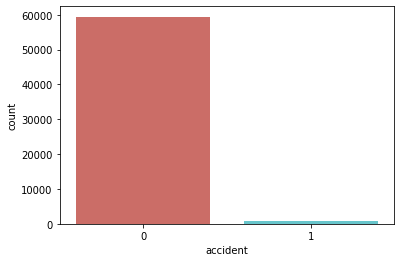

In [13]:
#Plotting potential accidents in training dataset
df.accident.value_counts()
sns.countplot(x = 'accident', data = df, palette = 'hls')
plt.show()

In [14]:
#Xtrain = df[["code","clientType","registrationMode","planName","duration","country","netSales","netProfit","gender","age"]]
#Xtest = df[["accident"]]
#Ytrain = dftest[["code","clientType","registrationMode","planName","duration","country","netSales","netProfit","gender","age"]]
#Ytest = dftest[["accident"]]

In [15]:
#logreg = LogisticRegression()
#logreg.fit(Xtrain,Ytrain)

In [16]:
#classifier.fit(df.drop('accident',1), df['accident'])
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#predictions = result.predict(X_test)

In [18]:
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(df)
print(result)

[[  3.   0.   0. ... 392.   0.  80.]
 [  3.   0.   0. ... 392.   0.  70.]
 [  6.   0.   1. ... 707.   2.  31.]
 ...
 [  9.   1.   1. ... 305.   1.  56.]
 [  9.   1.   1. ... 305.   1.  62.]
 [  9.   1.   1. ... 383.   0.  34.]]


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [22]:
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf.fit(X_train, y_train)
#nb_predict_train = result.predict(Xtrain)
#result.predict(result)
print(result)

[[  3.   0.   0. ... 392.   0.  80.]
 [  3.   0.   0. ... 392.   0.  70.]
 [  6.   0.   1. ... 707.   2.  31.]
 ...
 [  9.   1.   1. ... 305.   1.  56.]
 [  9.   1.   1. ... 305.   1.  62.]
 [  9.   1.   1. ... 383.   0.  34.]]


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.predict(X)